In [27]:
import chardet
import pandas as pd
import numpy as np
from scipy.spatial import distance

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [28]:
# Mac 환경에서 사용 가능한 기본 한글 폰트 설정
plt.rcParams["font.family"] = "AppleGothic"

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

In [29]:
def open_with_auto_sensing_encoding_types(file_path):
    with open(file_path, 'rb') as f:
        rawdata = f.read()
        result = chardet.detect(rawdata)
        encoding_type = result['encoding']

    print(f"파일의 인코딩: {encoding_type}")
    # 감지된 인코딩으로 파일 읽기
    df = pd.read_csv(file_path, encoding=encoding_type)
    print(len(df))
    return df

In [30]:
법정동_path = "/Users/yujin/Desktop/파일/3-1/데이터분석 공모전/codes/키즈카페입지분석2/법정동단위통합파일.csv"
법정동_df = open_with_auto_sensing_encoding_types(법정동_path)
법정동_df


파일의 인코딩: utf-8
7


,Unnamed: 0,법정동,총인구수,0~4세,5~9세,0~9세,실내놀이터,세대당인구,0~4세비율,5~9세비율,0~9세비율,실내놀이터당아동
0,0,광장동,33971,660,1716,2376,1,2.870000,0.019428,0.050514,0.069942,2376.00
1,1,구의동,76577,1533,2106,3639,4,2.103333,0.020019,0.027502,0.047521,909.75
2,2,군자동,19070,318,396,714,1,1.690000,0.016675,0.020766,0.037441,714.00
3,3,능동,11097,220,229,449,1,1.710000,0.019825,0.020636,0.040461,449.00
4,4,자양동,92565,1992,2517,4509,5,2.070000,0.021520,0.027192,0.048712,901.80
5,5,중곡동,79081,1292,1558,2850,5,1.915000,0.016338,0.019701,0.036039,570.00
6,6,화양동,23193,164,162,326,0,1.280000,0.007071,0.006985,0.014056,0.00


In [31]:
print(법정동_df.head(10))

   Unnamed: 0  법정동   총인구수  0~4세  5~9세  0~9세  실내놀이터     세대당인구    0~4세비율  \
0           0  광장동  33971   660  1716  2376      1  2.870000  0.019428   
1           1  구의동  76577  1533  2106  3639      4  2.103333  0.020019   
2           2  군자동  19070   318   396   714      1  1.690000  0.016675   
3           3   능동  11097   220   229   449      1  1.710000  0.019825   
4           4  자양동  92565  1992  2517  4509      5  2.070000  0.021520   
5           5  중곡동  79081  1292  1558  2850      5  1.915000  0.016338   
6           6  화양동  23193   164   162   326      0  1.280000  0.007071   

     5~9세비율    0~9세비율  실내놀이터당아동  
0  0.050514  0.069942   2376.00  
1  0.027502  0.047521    909.75  
2  0.020766  0.037441    714.00  
3  0.020636  0.040461    449.00  
4  0.027192  0.048712    901.80  
5  0.019701  0.036039    570.00  
6  0.006985  0.014056      0.00  


In [32]:
len(법정동_df.columns)

12

# 법정동 단위 입지 분석을 위한 군집화

In [33]:

# 분석 대상 컬럼
features = ["실내놀이터당아동", "0~9세", "0~9세비율"]

# 정규화
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(법정동_df[features])

# 군집 개수 선택 (여기선 3개로 설정)
kmeans = KMeans(n_clusters=3, random_state=42)
법정동_df["입지군집"] = kmeans.fit_predict(df_scaled)

# 군집별 평균 값 확인
cluster_summary = 법정동_df.groupby("입지군집")[features].mean().round(2)



/Users/yujin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/yujin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yujin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yujin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yujin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

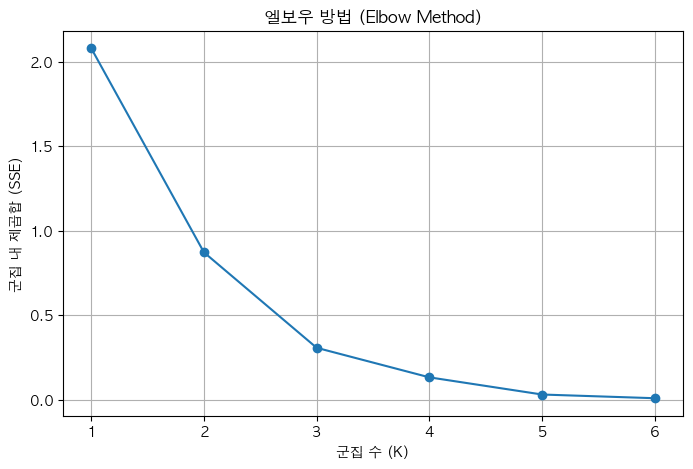

In [39]:


# 사용할 피처
features = ["실내놀이터당아동", "0~9세", "0~9세비율"]

# 데이터 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(법정동_df[features])

# -----------------------------
# 1. 엘보우 방법: SSE vs K
# -----------------------------
sse = []
k_range = range(1, 7)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    sse.append(km.inertia_)  # 군집 내 거리 제곱합

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title("엘보우 방법 (Elbow Method)")
plt.xlabel("군집 수 (K)")
plt.ylabel("군집 내 제곱합 (SSE)")
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [36]:
cluster_summary

,실내놀이터당아동,0~9세,0~9세비율
입지군집,,,
0,387.67,496.33,0.03
1,793.85,3666.00,0.04
2,2376.00,2376.00,0.07


In [37]:
법정동_df

,Unnamed: 0,법정동,총인구수,0~4세,5~9세,0~9세,실내놀이터,세대당인구,0~4세비율,5~9세비율,0~9세비율,실내놀이터당아동,입지군집,cluster
0,0,광장동,33971,660,1716,2376,1,2.870000,0.019428,0.050514,0.069942,2376.00,2,2
1,1,구의동,76577,1533,2106,3639,4,2.103333,0.020019,0.027502,0.047521,909.75,1,1
2,2,군자동,19070,318,396,714,1,1.690000,0.016675,0.020766,0.037441,714.00,0,0
3,3,능동,11097,220,229,449,1,1.710000,0.019825,0.020636,0.040461,449.00,0,0
4,4,자양동,92565,1992,2517,4509,5,2.070000,0.021520,0.027192,0.048712,901.80,1,1
5,5,중곡동,79081,1292,1558,2850,5,1.915000,0.016338,0.019701,0.036039,570.00,1,1
6,6,화양동,23193,164,162,326,0,1.280000,0.007071,0.006985,0.014056,0.00,0,0


In [ ]:
# 군집화에 사용된 피처
features = ["실내놀이터당아동", "0~9세", "0~9세비율"]

# 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(법정동_df[features])

# 실루엣 점수 계산
score = silhouette_score(scaled_data, 법정동_df["입지군집"])
print(f"실루엣 점수: {score:.4f}")


실루엣 점수: 0.4675


## 법정동 단위 적용 결과 : 광장동 선택

# 행정동 단위로 소득분위와, 아동수를 대입해서 분석

In [41]:
cluster2_df = 법정동_df[법정동_df["cluster"] == 2]
cluster2_df

,Unnamed: 0,법정동,총인구수,0~4세,5~9세,0~9세,실내놀이터,세대당인구,0~4세비율,5~9세비율,0~9세비율,실내놀이터당아동,입지군집,cluster
0,0,광장동,33971,660,1716,2376,1,2.87,0.019428,0.050514,0.069942,2376.0,2,2


In [40]:
cluster1_df = 법정동_df[법정동_df["cluster"] == 1]
cluster1_df

,Unnamed: 0,법정동,총인구수,0~4세,5~9세,0~9세,실내놀이터,세대당인구,0~4세비율,5~9세비율,0~9세비율,실내놀이터당아동,입지군집,cluster
1,1,구의동,76577,1533,2106,3639,4,2.103333,0.020019,0.027502,0.047521,909.75,1,1
4,4,자양동,92565,1992,2517,4509,5,2.070000,0.021520,0.027192,0.048712,901.80,1,1
5,5,중곡동,79081,1292,1558,2850,5,1.915000,0.016338,0.019701,0.036039,570.00,1,1


In [45]:
행정동_df_path = "/Users/yujin/Desktop/파일/3-1/데이터분석 공모전/codes/키즈카페입지분석2/행정동단위통합파일_v2.csv"
행정동_df = open_with_auto_sensing_encoding_types(행정동_df_path)
행정동_df

파일의 인코딩: utf-8
15


,Unnamed: 0,행정동명,총인구수,0~4세,5~9세,0~9세,소득분위,가구수,법정동,법정동_실내놀이터
0,0,중곡1동,15239,264,256,520,6.0,8644.0,중곡동,5
1,1,중곡2동,20521,302,489,791,6.0,10569.0,중곡동,5
2,2,중곡3동,15727,272,288,560,5.0,8495.0,중곡동,5
3,3,중곡4동,27594,454,525,979,6.0,13022.0,중곡동,5
4,4,능동,11097,220,229,449,6.0,6456.0,능동,1
5,5,구의1동,23127,365,467,832,6.0,12519.0,구의동,4
6,6,구의2동,25610,528,772,1300,6.0,11380.0,구의동,4
7,7,구의3동,27840,640,867,1507,8.0,12048.0,구의동,4
8,8,광장동,33971,660,1716,2376,9.0,11851.0,광장동,1
9,9,자양1동,21833,293,398,691,6.0,11960.0,자양동,5


## 광장동 분석

In [47]:
군집2 = 행정동_df[행정동_df["법정동"] == "광장동"]
군집2

,Unnamed: 0,행정동명,총인구수,0~4세,5~9세,0~9세,소득분위,가구수,법정동,법정동_실내놀이터
8,8,광장동,33971,660,1716,2376,9.0,11851.0,광장동,1


### 소득분위기 가장 높은 지역이기 때문에, 서울형 키즈카페로 우선 선정하기는 아쉽다. 다른 군집을 살펴보고 나서, 되돌아오자

## 구의동, 자양동, 중곡동 분석

In [50]:
군집1 = 행정동_df[행정동_df["법정동"].isin(["구의동", "자양동", "중곡동"])]
군집1

,Unnamed: 0,행정동명,총인구수,0~4세,5~9세,0~9세,소득분위,가구수,법정동,법정동_실내놀이터
0,0,중곡1동,15239,264,256,520,6.0,8644.0,중곡동,5
1,1,중곡2동,20521,302,489,791,6.0,10569.0,중곡동,5
2,2,중곡3동,15727,272,288,560,5.0,8495.0,중곡동,5
3,3,중곡4동,27594,454,525,979,6.0,13022.0,중곡동,5
5,5,구의1동,23127,365,467,832,6.0,12519.0,구의동,4
6,6,구의2동,25610,528,772,1300,6.0,11380.0,구의동,4
7,7,구의3동,27840,640,867,1507,8.0,12048.0,구의동,4
9,9,자양1동,21833,293,398,691,6.0,11960.0,자양동,5
10,10,자양2동,23628,531,641,1172,7.0,10890.0,자양동,5
11,11,자양3동,27221,798,1053,1851,8.0,10951.0,자양동,5


#### 네이버지도 노가다 분석..

구의1동 : 0개

구의2동 : 2개

구의3동 : 2개

자양4동 : 4개 (뚝섬 키즈카페 포함)

자양3동 : 3개

자양1동 : 1개 (1, 2동 경계에 키즈카페 위치)

자양2동 : 1개

중곡1동 : 2개

중곡2동 : 1개

중곡3동 : 1개

## 유력후보 **구의1동**